<a href="https://colab.research.google.com/github/ShalilG/Stock-Market-Analysis/blob/main/LinRegSPYpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Description: Predict the prices of the SPY

In [3]:
pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
#Import the libraries 

import pandas as pd 
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
plt.style.use('fivethirtyeight')

In [5]:
#Load the data 
tick = 'SPY'

In [32]:
#Show the data
df = yf.download(tick, start = '2022-01-01', end = '2022-10-05')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,476.299988,477.850006,473.850006,477.709991,472.242310,72668200
2022-01-04 00:00:00-05:00,479.220001,479.980011,475.579987,477.549988,472.084137,71178700
2022-01-05 00:00:00-05:00,477.160004,477.980011,468.279999,468.380005,463.019104,104538900
2022-01-06 00:00:00-05:00,467.890015,470.820007,465.429993,467.940002,462.584137,86858900
2022-01-07 00:00:00-05:00,467.950012,469.200012,464.649994,466.089996,460.755280,85111600
...,...,...,...,...,...,...
2022-09-28 00:00:00-04:00,364.380005,372.299988,362.600006,370.529999,370.529999,110802200
2022-09-29 00:00:00-04:00,366.809998,367.109985,359.700012,362.790009,362.790009,112952300
2022-09-30 00:00:00-04:00,361.799988,365.910004,357.040009,357.179993,357.179993,153396100


In [33]:
#Plot the linear regression line using the close price 
df3 = df.copy()
#Create a new column called numbers that ranges from 0 to the length of the dataset 
df3['Numbers'] = list(range(0, len(df3)))

#Store the Numbers column in to a variable called X as an array 

X = np.array(df3[['Numbers']])
#Store the close price as an array 

y = df3['Close'].values 

#Create and train the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 455.22239747540164
Slope: [-0.4082175]


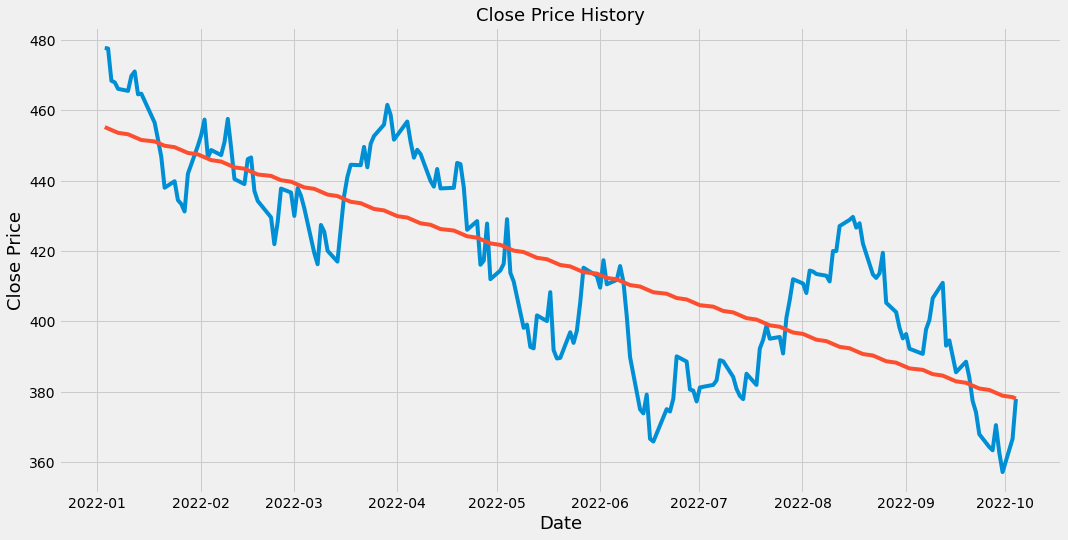

In [34]:
#Prepare the data for visualization 
#Get the predicted prices of the model and store them into a variable called 'y_pred'

y_pred = lin_model.coef_* X + lin_model.intercept_ #y = mx + b

#Store the predicted values in a column called Pred 
df3['Pred'] = y_pred

#df3['Pred'].plot()
#df3['Close'].plot()
#plt.title('Close Price History')

#Visually show the close price 
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize=18)
plt.plot(df3['Close'])
plt.plot(df3['Pred'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [35]:
#How good is the model 

#r2 shows the goodness of fit, how well the model fits the data 

r2_score(df3['Close'], df3['Pred'])

0.6212507278428114

In [36]:
#Show the price for the data based on the model 

lin_model.coef_* len(df3)+1 + lin_model.intercept_

array([378.66107171])